# NMF Practical Work

**Roland Badeau - Notebook code by Umut Simsekli** 

Telecom Paris - TSIA 206

In [1]:
%matplotlib inline

In [2]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# # And the display module for visualization
import librosa.display


C:\Users\lmcastanedame\AppData\Local\Temp\ipykernel_14704\1529239179.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(np.abs(X)), origin="lower")


<Figure size 640x480 with 0 Axes>

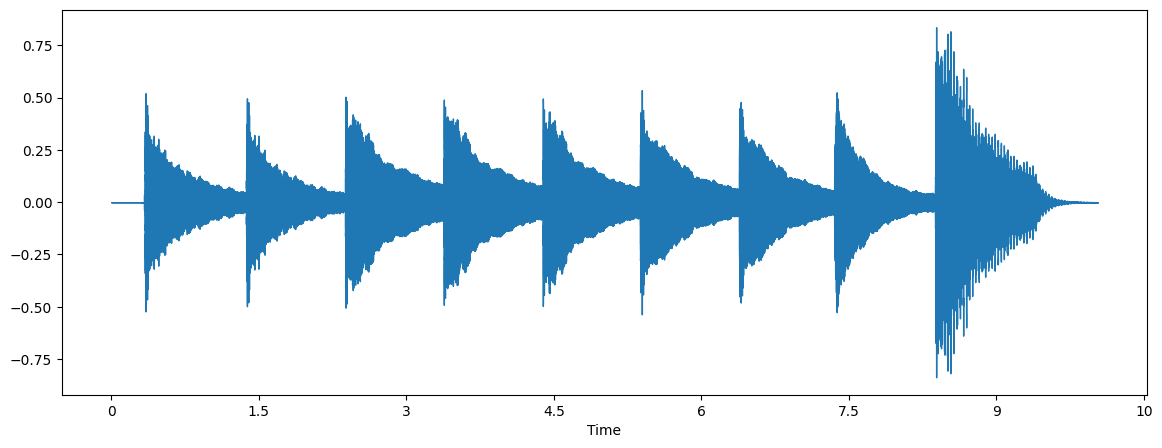

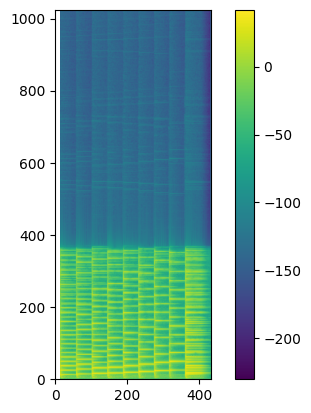

In [3]:
# Audio file
fname = 'Cmajor_piano8khz.wav'

# Load signal
y, sr = librosa.load(fname)

# Compute STFT
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

#Visualize the waveform
plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

#Visualize the spectrum
plt.figure()
plt.imshow(20*np.log10(np.abs(X)), origin="lower")
plt.colorbar()


## 1. By following the technique that we used in the lecture, derive the MUR algorithm by yourselves

1. **Gradient of the Cost Function w.r.t. $W$**:
$$\frac{\partial d_\beta}{\partial W} = 0 = \frac{(\beta-1)}{\beta-1} X (WH)^{\beta-2} H^T + \frac{\beta}{\beta} (WH)^{\beta-1} H^T$$
   Simplifying gives:
$$\frac{\partial d_\beta}{\partial W} = -X(WH)^{\beta-2} H^T + (WH)^{\beta-1} H^T$$

2. **Gradient Descent Update for $W$**:
$$W \leftarrow W - \eta_W \left( -X(WH)^{\beta-2} H^T + (WH)^{\beta-1} H^T \right)$$

3. **Choosing Step Size $\eta_W$**:
$$\eta_W = \frac{W}{(WH)^{\beta-1} H^T}$$

4. **Substitute $\eta_W$ into the Gradient Descent Update**:
$$W \leftarrow W - \frac{W}{(WH)^{\beta-1} H^T} \left( -X(WH)^{\beta-2} H^T + (WH)^{\beta-1} H^T \right)$$
   Simplifying the expression inside the parentheses:
$$W \leftarrow W \left( 1 + \frac{X(WH)^{\beta-2} H^T}{(WH)^{\beta-1} H^T} - 1 \right)$$
$$W \leftarrow W \odot \frac{X \odot (WH)^{\beta-2} H^T}{(WH)^{\beta-1} H^T}$$

### Derivation of Update Rules for $H$
1. **Gradient of the Cost Function w.r.t. $H$**:
$$\frac{\partial d_\beta}{\partial H} = 0 = \frac{(\beta-1)}{\beta-1} W^T(X \odot (WH)^{\beta-1}) + \frac{\beta}{\beta} W^T (WH)^{\beta-1}$$
   Simplifying gives:
$$\frac{\partial d_\beta}{\partial H} = -W^T(X \odot (WH)^{\beta-2}) + W^T(WH)^{\beta-1}$$

2. **Gradient Descent Update for $H$**:
$$H \leftarrow H - \eta_H \left( -W^T (X \odot (WH)^{\beta-2}) + W^T (WH)^{\beta-1} \right)$$

3. **Choosing Step Size $\eta_H$**:
$$\eta_H = \frac{H}{W^T (WH)^{\beta-1}}$$

4. **Substitute $\eta_H$ into the Gradient Descent Update**:
$$H \leftarrow H - \frac{H}{W^T (WH)^{\beta-1}} \left( -W^T (X \odot (WH)^{\beta-2}) + W^T (WH)^{\beta-1} \right)$$
   Simplifying the expression inside the parentheses:
$$H \leftarrow H \left( 1 + \frac{W^T (X \odot (WH)^{\beta-2})}{W^T (WH)^{\beta-1}} - 1 \right)$$
$$H \leftarrow H \odot \frac{W^T (X \odot (WH)^{\beta-2})}{W^T (WH)^{\beta-1}}$$

The final multiplicative update rules for $W$ and $H$ are:

$$W \leftarrow W \odot \frac{X \odot (WH)^{\beta-2} H^T}{(WH)^{\beta-1} H^T}$$
$$H \leftarrow H \odot \frac{W^T (X \odot (WH)^{\beta-2})}{W^T (WH)^{\beta-1}}$$

## 2. Implement MUR for NMF with beta-divergence 

In [9]:
np.random.seed(0)
W = np.random.rand(X.shape[0], 8)
H = np.random.rand(8, X.shape[1])

beta = 1  # Can be set to 0 for IS divergence, 1 for KL divergence, etc.
epsilon = 1e-6  # Small constant to avoid division by zero

In [7]:
# Define update functions
def update_W(X, W, H, beta):
    WH = W @ H
    numerator = X * np.power(WH + epsilon, beta - 2)
    numerator = numerator @ H.T
    denominator = np.power(WH + epsilon, beta - 1) @ H.T
    return W * (numerator / denominator)

def update_H(X, W, H, beta):
    WH = W @ H
    numerator = X * np.power(WH + epsilon, beta - 2)
    numerator = W.T @ numerator
    denominator = W.T @ np.power(WH + epsilon, beta - 1)
    return H * (numerator / denominator)


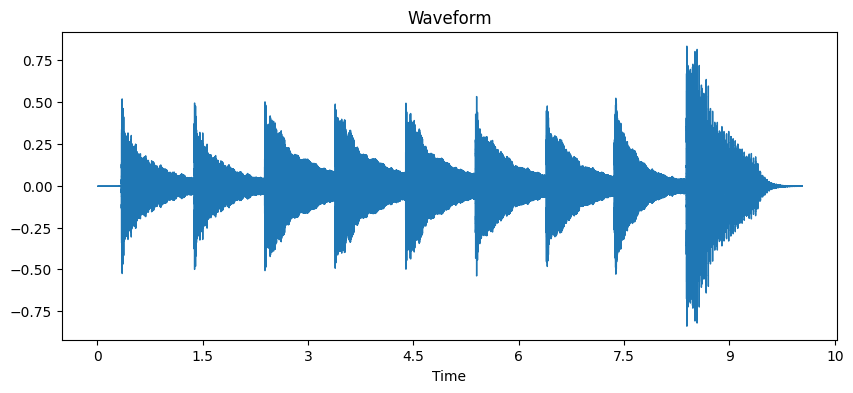

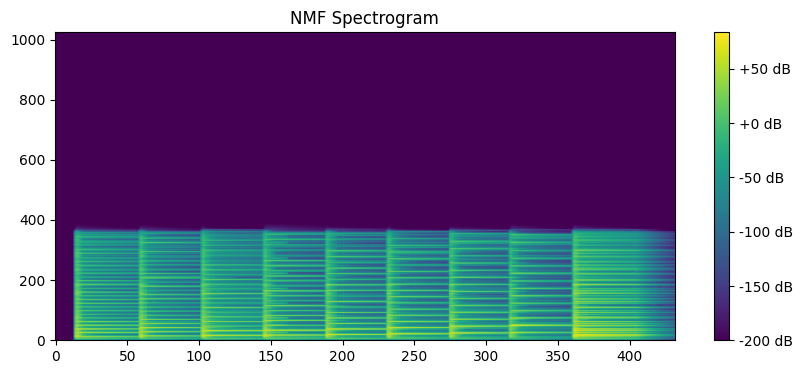

In [8]:
# NMF with multiplicative update rules
n_iter = 100

for i in range(n_iter):
    H = update_H(X, W, H, beta)
    W = update_W(X, W, H, beta)

# Visualize the results
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

plt.figure(figsize=(10, 4))
plt.imshow(20 * np.log10(np.abs(W @ H) + epsilon), origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('NMF Spectrogram')
plt.show()


## 3. Experiment with the algorithm parameters, such as $\beta$, number of columns in $W$, STFT window size, hop size, etc. 

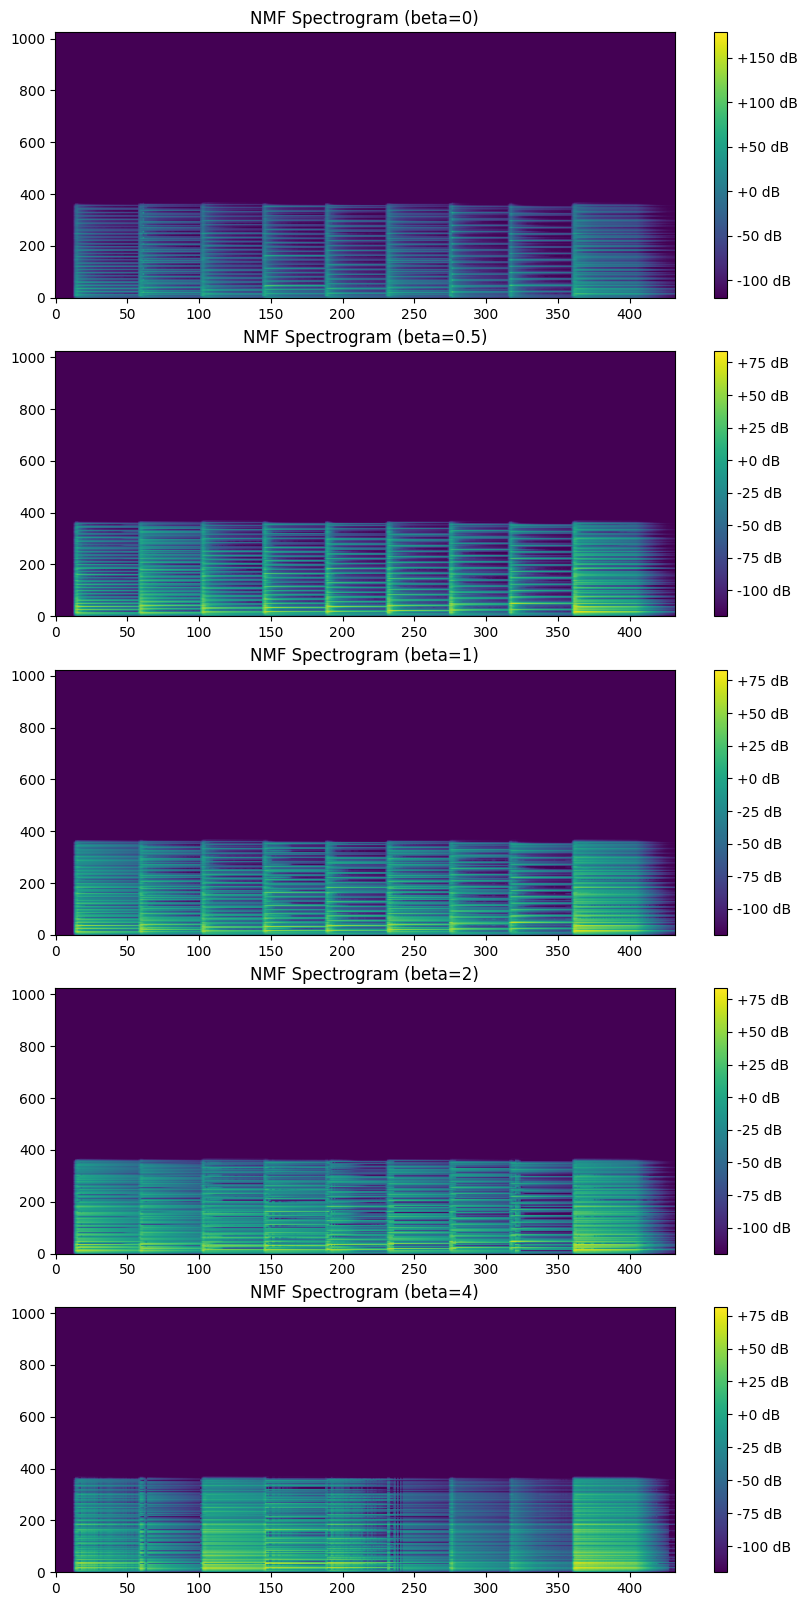

In [15]:
# Experiment with different values of beta
betas = [0, 0.5, 1, 2, 4]

plt.figure(figsize=(10, 4 * len(betas)))
for i, beta in enumerate(betas):
    W = np.random.rand(X.shape[0], 8)
    H = np.random.rand(8, X.shape[1])
    for j in range(n_iter):
        H = update_H(X, W, H, beta)
        W = update_W(X, W, H, beta)
    plt.subplot(len(betas), 1, i + 1)
    plt.imshow(20 * np.log10(np.abs(W @ H) + epsilon), origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('NMF Spectrogram (beta={})'.format(beta))

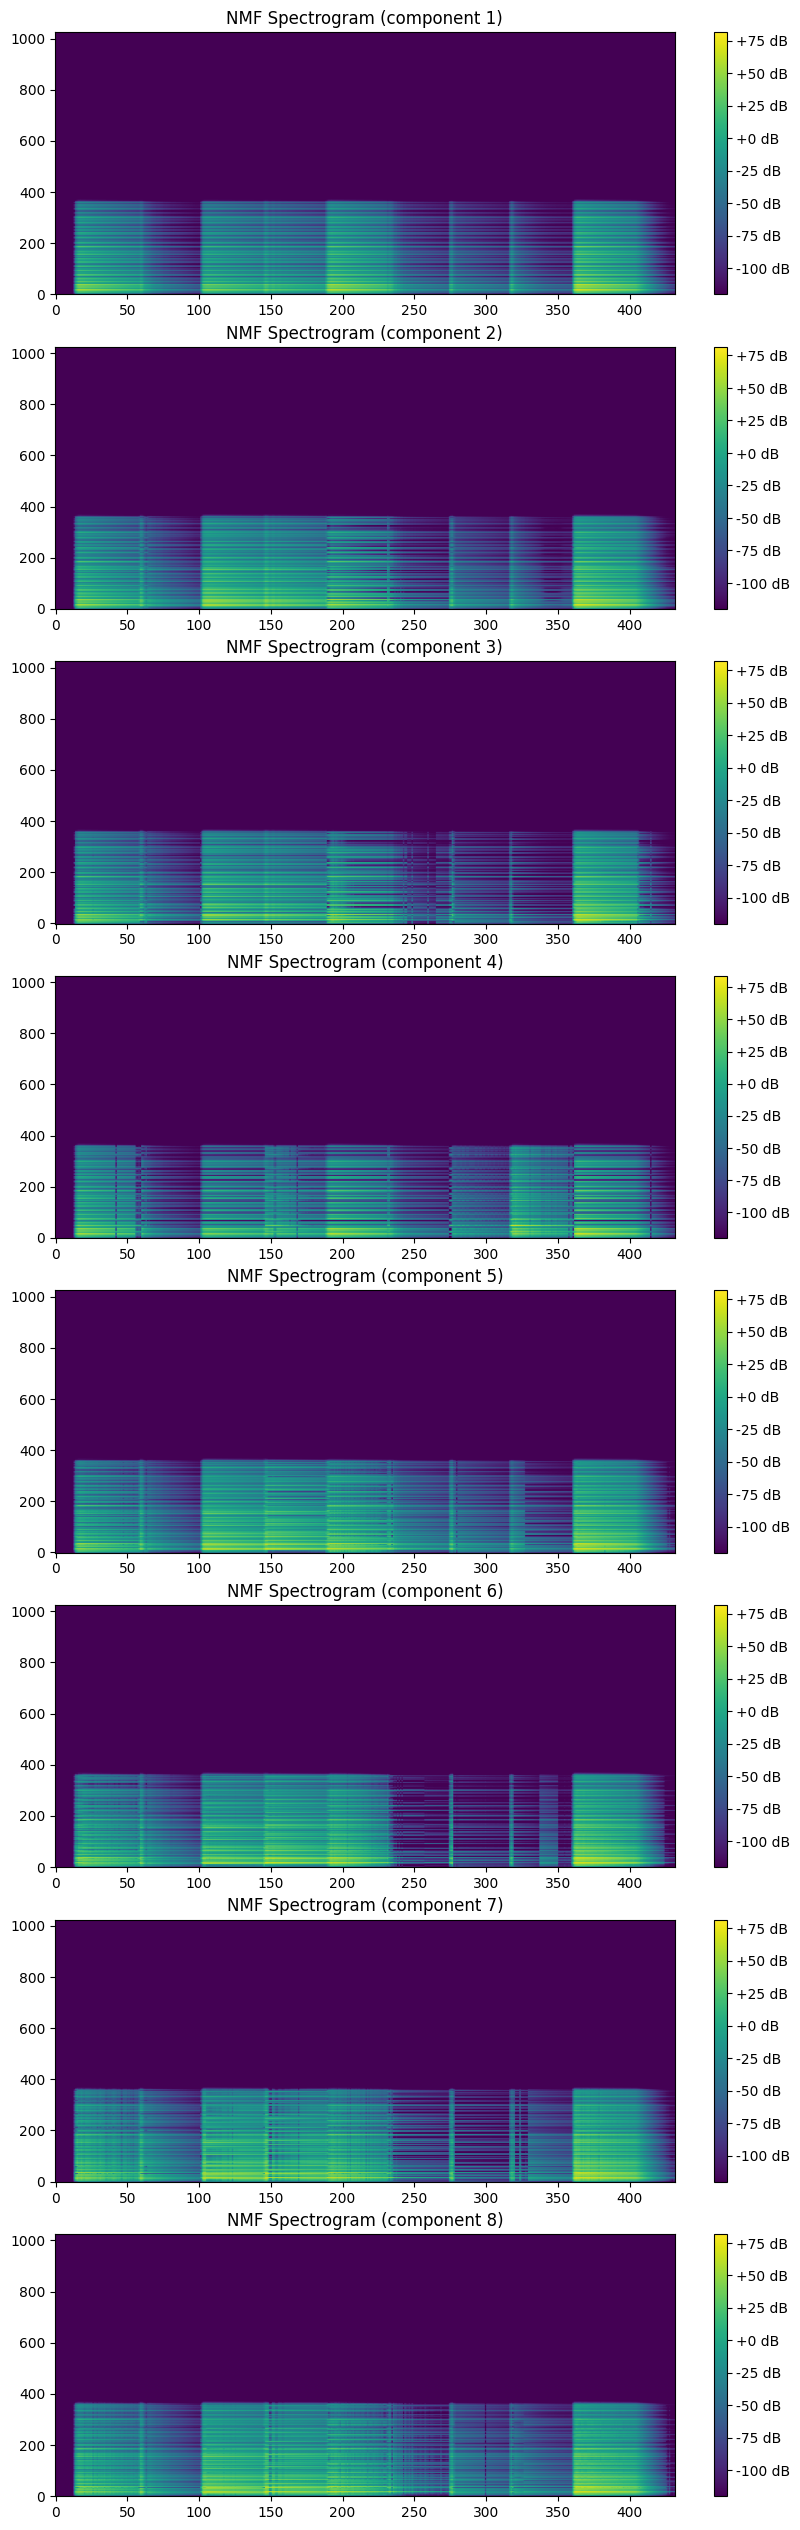

In [17]:
# Experiment with different columns of W
plt.figure(figsize=(10, 4 * 8))
for i in range(8):
    W = np.random.rand(X.shape[0], i + 1)
    H = np.random.rand(i + 1, X.shape[1])
    for j in range(n_iter):
        H = update_H(X, W, H, beta)
        W = update_W(X, W, H, beta)
    plt.subplot(8, 1, i + 1)
    plt.imshow(20 * np.log10(np.abs(W @ H) + epsilon), origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('NMF Spectrogram (component {})'.format(i + 1))

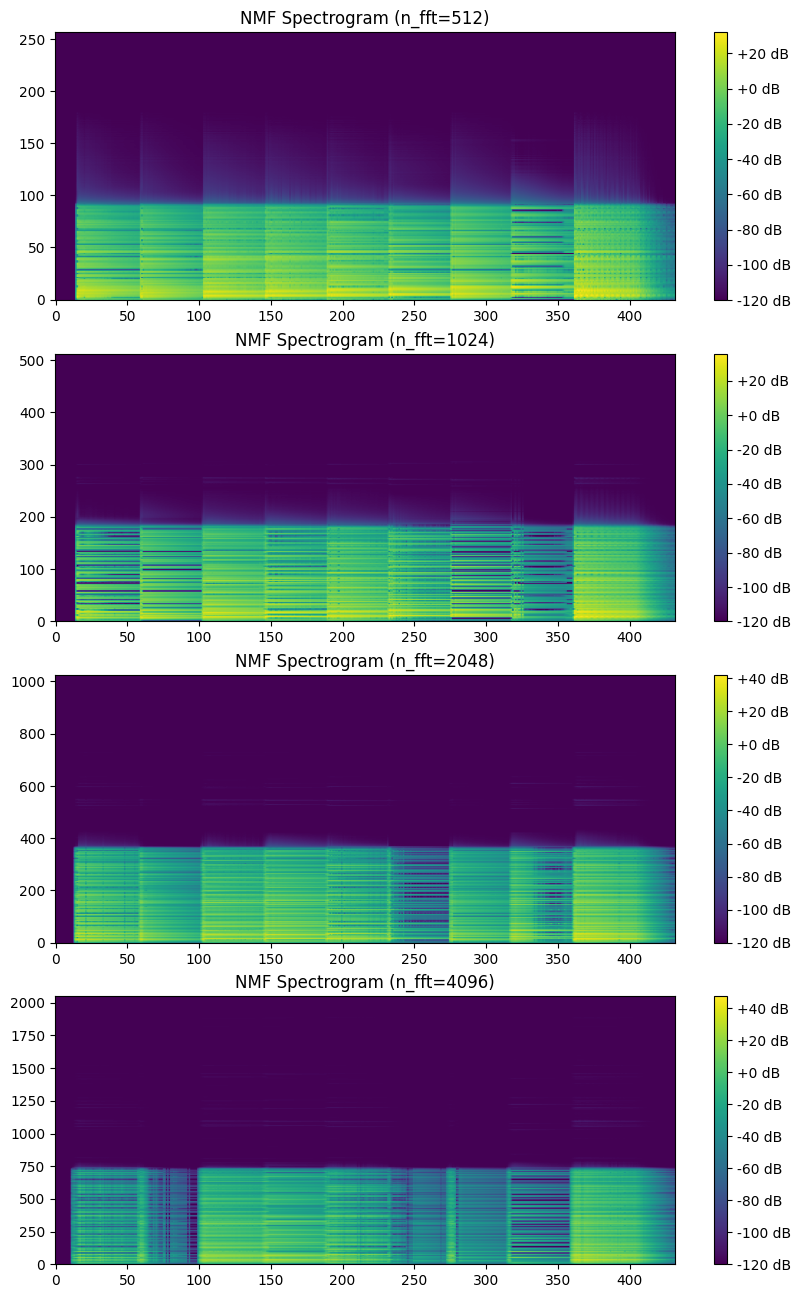

In [18]:
# Experiment for different STFT window sizes
n_ffts = [512, 1024, 2048, 4096]

plt.figure(figsize=(10, 4 * len(n_ffts)))
for i, n_fft in enumerate(n_ffts):
    Xstft = librosa.stft(y, n_fft=n_fft, hop_length=512, win_length=None)
    X = np.abs(Xstft)
    W = np.random.rand(X.shape[0], 8)
    H = np.random.rand(8, X.shape[1])
    for j in range(n_iter):
        H = update_H(X, W, H, beta)
        W = update_W(X, W, H, beta)
    plt.subplot(len(n_ffts), 1, i + 1)
    plt.imshow(20 * np.log10(np.abs(W @ H) + epsilon), origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('NMF Spectrogram (n_fft={})'.format(n_fft))

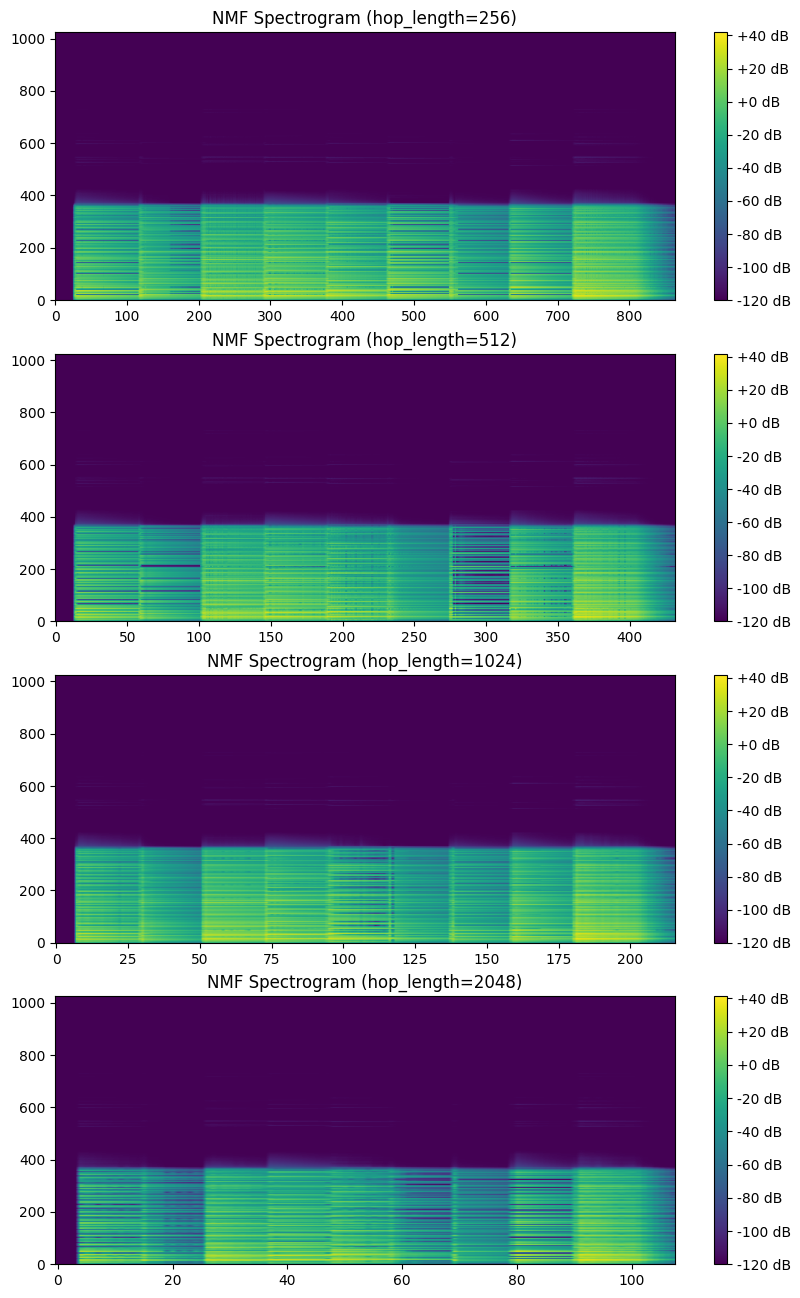

In [19]:
# Experiment for different hop lengths
hop_lengths = [256, 512, 1024, 2048]

plt.figure(figsize=(10, 4 * len(hop_lengths)))
for i, hop_length in enumerate(hop_lengths):
    Xstft = librosa.stft(y, n_fft=2048, hop_length=hop_length, win_length=None)
    X = np.abs(Xstft)
    W = np.random.rand(X.shape[0], 8)
    H = np.random.rand(8, X.shape[1])
    for j in range(n_iter):
        H = update_H(X, W, H, beta)
        W = update_W(X, W, H, beta)
    plt.subplot(len(hop_lengths), 1, i + 1)
    plt.imshow(20 * np.log10(np.abs(W @ H) + epsilon), origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('NMF Spectrogram (hop_length={})'.format(hop_length))

## 4. Reconstruct each musical note separately

In [26]:
# Wiener filtering for reconstruct each component separately

# Compute Wiener filter
def wiener_filter(X, W, H, i):
    numerator = W[:, i:i + 1] @ H[i:i + 1, :]
    filter = numerator / (W @ H + epsilon)
    return X * filter

In [21]:
Xstft = librosa.stft(y, n_fft=2048, hop_length=512, win_length=None)
X = np.abs(Xstft)

np.random.seed(0)
W = np.random.rand(X.shape[0], 8)
H = np.random.rand(8, X.shape[1])

beta = 1  # Can be set to 0 for IS divergence, 1 for KL divergence, etc.
epsilon = 1e-6  # Small constant to avoid division by zero

for i in range(n_iter):
    H = update_H(X, W, H, beta)
    W = update_W(X, W, H, beta)

In [34]:
# Compute Wiener filters for each component
k = 8
notes = []
for i in range(k):
    Xwiener = wiener_filter(X, W, H, i)
    notes.append(librosa.istft(Xwiener))

In [37]:
ipd.Audio(notes[0], rate=sr)

In [ ]:
ipd.Audio(notes[1], rate=sr)

In [ ]:
ipd.Audio(notes[2], rate=sr)

In [ ]:
ipd.Audio(notes[3], rate=sr)

In [ ]:
ipd.Audio(notes[4], rate=sr)

In [ ]:
ipd.Audio(notes[5], rate=sr)

In [ ]:
ipd.Audio(notes[6], rate=sr)

In [ ]:
ipd.Audio(notes[7], rate=sr)